# **Imports**

In [45]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, regularizers # type: ignore

import numpy as np

import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## **Importing CIFAR Dataset**

In [46]:
# This has 60,000 32x32 color images with 10 classes and 6000 images for each class.

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

### **Normalizing Data**

In [47]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## **Class Names**

In [48]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## **Show Image**

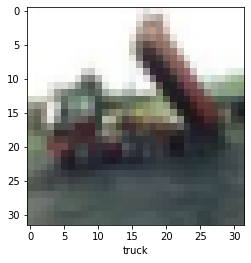

In [49]:
img_selector = 2

plt.imshow(train_images[img_selector], cmap= plt.cm.binary)

plt.xlabel(class_names[train_labels[img_selector][0]])

plt.show()

# **Building Model**

In [50]:
model = models.Sequential()

## **Convoluted Layers**

In [51]:
model.add(layers.Conv2D(32, (3, 3), activation= 'relu', input_shape= (32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding= 'same', kernel_regularizer= regularizers.l2(0.01), activation= 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding= 'same', kernel_regularizer= regularizers.l2(0.01), activation= 'relu'))


In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_2 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 15, 15, 64)      

## **Dense Layers**

In [53]:
model.add(layers.Flatten())
model.add(layers.Dense(100, activation= 'relu'))
model.add(layers.Dense(50, activation= 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_2 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 15, 15, 64)      

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 200)               205000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
=================================================================
Total params: 286,980
Trainable params: 286,980
Non-trainable params: 0
_________________________________________________________________

# **Compile Model**

In [ ]:
model.compile(  optimizer= 'adam',
                loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
                metrics= ['accuracy'])

history = model.fit(train_images, train_labels, batch_size=1000, epochs= 100, validation_data=(test_images, test_labels), verbose = 1)

Epoch 1/100
50/50 [==============================] - 5s 66ms/step - loss: 2.9231 - accuracy: 0.2425 - val_loss: 2.8683 - val_accuracy: 0.1245
Epoch 2/100
50/50 [==============================] - 2s 49ms/step - loss: 2.1128 - accuracy: 0.4013 - val_loss: 2.8737 - val_accuracy: 0.1078
Epoch 3/100
50/50 [==============================] - 2s 49ms/step - loss: 1.7365 - accuracy: 0.4799 - val_loss: 2.9622 - val_accuracy: 0.1128
Epoch 4/100
50/50 [==============================] - 3s 52ms/step - loss: 1.5312 - accuracy: 0.5310 - val_loss: 3.0756 - val_accuracy: 0.1139
Epoch 5/100
50/50 [==============================] - 2s 49ms/step - loss: 1.3707 - accuracy: 0.5770 - val_loss: 2.9189 - val_accuracy: 0.1508
Epoch 6/100
50/50 [==============================] - 3s 52ms/step - loss: 1.2621 - accuracy: 0.6152 - val_loss: 3.5788 - val_accuracy: 0.1566
Epoch 7/100
50/50 [==============================] - 2s 49ms/step - loss: 1.1850 - accuracy: 0.6405 - val_loss: 2.7247 - val_accuracy: 0.2292
Epoch 


Epoch 50/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0716 - accuracy: 0.9769 - val_loss: 2.3869 - val_accuracy: 0.6806

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f'{test_loss:.2f} | {test_acc:.2f}')

# **Data Augmentation**

datagen = ImageDataGenerator(
    rotation_range= 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    fill_mode= 'nearest'
)

augmented_history = model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs= 10, validation_data=(test_images, test_labels), verbose=1)

In [ ]:
datagen = ImageDataGenerator( rotation_range= 40, 
                              width_shift_range= 0.2, 
                              height_shift_range= 0.2, 
                              shear_range= 0.2, 
                              zoom_range= 0.2,
                              horizontal_flip= True,
                              fill_mode= 'nearest' )

augmented_history = model.fit(datagen.flow(train_images, train_labels, batch_size=1000), epochs= 100, validation_data=(test_images, test_labels), verbose=1)


# **Making Predictions**

In [ ]:
predictions = model.predict(test_images)

img_selector = 0

plt.imshow(test_images[img_selector], cmap= plt.cm.binary)
plt.title('Expected: '+ class_names[test_labels[img_selector][0]])
plt.xlabel('Predicted: '+ class_names[np.argmax(predictions[img_selector])])

plt.show()

In [ ]:
!nvidia-smi